Evan Nyhus and Isaac Popper will be evaluating the effect of wingspan on success in the NBA. Our github can be found here: https://github.com/ipopStats/Nyhus_Popper_CMPS3160_Project/blob/main/Wingspans.ipynb

**Project Goals**



*   Learn how to use pandas library
*   Create a data visualization project in Python
*   Demonstrate why wingspan is an overlooked metric
*   Determine how wingspan most affects performance in the NBA.




**Collaboration Plan**

We plan to meet once a week in the library to make progress combining the datasets, creating visualizations, and analyzing the data. We will meet on either on Thursday or Sunday evenings. We set up a private CoLab notebook so we can store our code and work on the project simultaneously. We will communicate through text message about when we will meet, and to help each other between meetings.

**Data Description**

We are seeking to examine the correlation between a player's wingspan and NBA success, with wingspan being the independent variable.

First, we brought in height and wingspan data from an NBA advanced metrics website called https://craftednba.com/. It is unclear how the data was gathered. The data can be sorted by position, which will allow us to group the data. We created csv files from the source and uploaded them to Google Drive. The length variable is the difference between height and wingspan.

Our second data source is FiveThirtyEight's modern RAPTOR database. RAPTOR is a player proposition value that draws from both player tracking and on-off NBA data. You can learn more about the algorithim here: https://fivethirtyeight.com/features/introducing-raptor-our-new-metric-for-the-modern-nba/. We will need to filter the dataset to 2017-2018. This will allow us to evaluate the impact wingspan has on player success. To eliminate noise and smooth the data, we will use 3 year averages to evaluate wingspan's impact on performance. You can access the data here: https://github.com/fivethirtyeight/data/blob/master/nba-raptor/.


Our third data source is NBA.com's advanced stats. With the league collecting and providing these player tracking metrics, we can evaluate the importance of wingpan length in certain elements of the game. For example, we will see if wingspan is important in terms of defending 3-pointers. You can access this data here: https://www.nba.com/stats/players/defense-dash-3pt?Season=2018-19.

**Code:**

In [59]:
import pandas as pd
import numpy as np
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Table 1

In [60]:
wingspan_guard = pd.read_csv("/content/drive/MyDrive/cmps3160/project/Guard_wingspan.csv")

def height_to_inches(height): # converts height in ft and in to height in inches
    parts = height.replace('"', '').split("'")
    feet = int(parts[0])
    if len(parts) > 1:
        inches = float(parts[1])
    else:
        inches = 0
    return feet * 12 + inches
def wingspan_to_inches(wingspan):#converts wingspan in ft and in to wingspan in inches
    parts = wingspan.replace('"', '').split("'")
    feet = int(parts[0])
    if len(parts) > 1:
        inches = float(parts[1])
    else:
        inches = 0
    return feet * 12 + inches
wingspan_guard['Height'] = wingspan_guard['Height'].apply(height_to_inches)
wingspan_guard['Wingspan'] = wingspan_guard['Wingspan'].apply(height_to_inches)

wingspan_guard.head()

,#,Name,Height,Wingspan,Length
0,1,Talen Horton-Tucker,74.50,85.25,10.75
1,2,Jalen Williams,76.50,86.25,9.75
2,3,Frank Ntilikina,76.00,85.00,9.00
3,4,Reggie Jackson,74.50,83.25,8.75
4,5,Donovan Mitchell,73.25,82.00,8.75


In [61]:
wingspan_center= pd.read_csv("/content/drive/MyDrive/cmps3160/project/Center_wingspan.csv")

def height_to_inches(height): # converts height in ft and in to height in inches
    parts = height.replace('"', '').split("'")
    feet = int(parts[0])
    if len(parts) > 1:
        inches = float(parts[1])
    else:
        inches = 0
    return feet * 12 + inches
def wingspan_to_inches(wingspan):#converts wingspan in ft and in to wingspan in inches
    parts = wingspan.replace('"', '').split("'")
    feet = int(parts[0])
    if len(parts) > 1:
        inches = float(parts[1])
    else:
        inches = 0
    return feet * 12 + inches
wingspan_center['Height'] = wingspan_center['Height'].apply(height_to_inches)
wingspan_center['Wingspan'] = wingspan_center['Wingspan'].apply(height_to_inches)

wingspan_center.head() #Read csv and display first 5 rows

,#,Name,Height,Wingspan,Length
0,1,Mo Bamba,83.25,94.00,10.75
1,2,Isaiah Stewart,79.25,88.75,9.50
2,3,Robert Williams III,80.00,89.50,9.50
3,4,Montrezl Harrell,79.00,88.25,9.25
4,5,Udoka Azubuike,82.00,91.25,9.25


In [62]:
wingspan_forward= pd.read_csv("/content/drive/MyDrive/cmps3160/project/Forward_wingspan.csv")

def height_to_inches(height): # converts height in ft and in to height in inches
    parts = height.replace('"', '').split("'")
    feet = int(parts[0])
    if len(parts) > 1:
        inches = float(parts[1])
    else:
        inches = 0
    return feet * 12 + inches
def wingspan_to_inches(wingspan):#converts wingspan in ft and in to wingspan in inches
    parts = wingspan.replace('"', '').split("'")
    feet = int(parts[0])
    if len(parts) > 1:
        inches = float(parts[1])
    else:
        inches = 0
    return feet * 12 + inches
wingspan_forward['Height'] = wingspan_forward['Height'].apply(height_to_inches)
wingspan_forward['Wingspan'] = wingspan_forward['Wingspan'].apply(height_to_inches)
wingspan_forward.head() #Read csv and display first 5 rows

,#,Name,Height,Wingspan,Length
0,1,Kawhi Leonard,78.00,87.00,9.00
1,2,Josh Okogie,75.00,84.00,9.00
2,3,Nassir Little,76.50,85.25,8.75
3,4,Kelly Oubre Jr.,77.75,86.25,8.50
4,5,Jerami Grant,78.50,86.75,8.25


In [63]:
wingspan_center.dtypes
#Mix of ints, objects, and floats. "Num" is the index.
wingspan_guard.dtypes
#Mix of ints, objects, and floats. "Num" is the index.
wingspan_forward.dtypes
#Mix of ints, objects, and floats. "Num" is the index.

#             int64
Name         object
Height      float64
Wingspan    float64
Length      float64
dtype: object

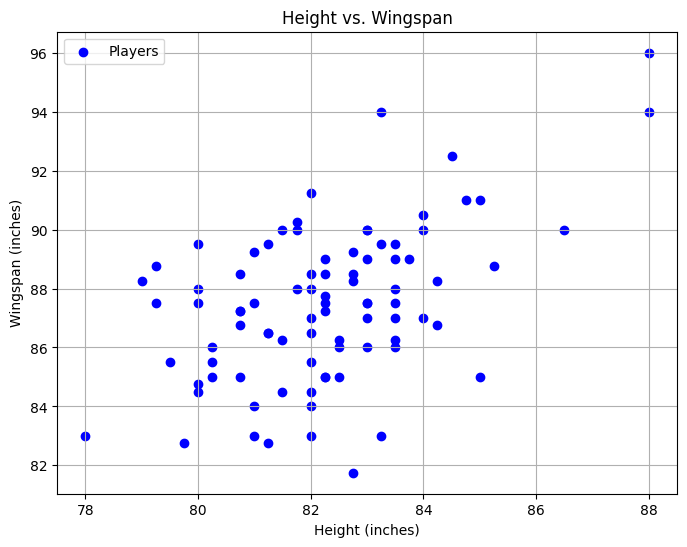

Correlation: 0.5


In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(wingspan_center['Height'], wingspan_center['Wingspan'], color='blue', label='Players')
plt.xlabel('Height (inches)')
plt.ylabel('Wingspan (inches)')
plt.title('Height vs. Wingspan')
plt.grid(True)
plt.legend()
plt.show()

# The two variables chosen for the scatterplot analysis were Height and Wingspan because it is important to check if a relation between both variables exists.
# If a meaningful correlation is established between wingspan and a players comprehensive value score, it must be assumed that height also has a role to play in that success.
# It is also important to see how  high the correlation is between Height and Wingspan before regressing player statistics onto wingspan.

correlation = wingspan_center['Height'].corr(wingspan_center['Wingspan'])
correlation = round(correlation, 2)
print(f"Correlation: {correlation}")
# The correlation between height in wingspan is 0.81. There is a strong positive linear relationship between the two variables.
#it is only necessary to look at one of the three positions when comapring height and wingspan because this relationship is not impacted by position in anyway




In [65]:
height_stats = wingspan_center['Height'].describe()
wingspan_stats = wingspan_center['Wingspan'].describe()

print("Height Summary Statistics:")
print(height_stats)
print("\nWingspan Summary Statistics:")
print(wingspan_stats)

# The summary statistics show that both data sets have 540 players, with wingspans being about 4 inches longer than a player's height, on average.
# The highest wingspan of 92.5 inches is 5.5 inches greater than the tallest height.
height_stats = wingspan_guard['Height'].describe()
wingspan_stats = wingspan_guard['Wingspan'].describe()

print("Height Summary Statistics:")
print(height_stats)
print("\nWingspan Summary Statistics:")
print(wingspan_stats)

height_stats = wingspan_forward['Height'].describe()
wingspan_stats = wingspan_forward['Wingspan'].describe()

print("Height Summary Statistics:")
print(height_stats)
print("\nWingspan Summary Statistics:")
print(wingspan_stats)

Height Summary Statistics:
count    87.000000
mean     82.261494
std       1.805558
min      78.000000
25%      81.000000
50%      82.250000
75%      83.250000
max      88.000000
Name: Height, dtype: float64

Wingspan Summary Statistics:
count    87.000000
mean     87.459770
std       2.645717
min      81.750000
25%      85.750000
50%      87.500000
75%      89.000000
max      96.000000
Name: Wingspan, dtype: float64
Height Summary Statistics:
count    181.000000
mean      75.273481
std        1.885011
min       68.000000
25%       74.000000
50%       75.500000
75%       76.500000
max       81.000000
Name: Height, dtype: float64

Wingspan Summary Statistics:
count    181.000000
mean      79.799724
std        2.601605
min       72.000000
25%       78.500000
50%       80.000000
75%       81.250000
max       86.250000
Name: Wingspan, dtype: float64
Height Summary Statistics:
count    179.000000
mean      79.125698
std        1.722369
min       75.000000
25%       77.750000
50%       79.00

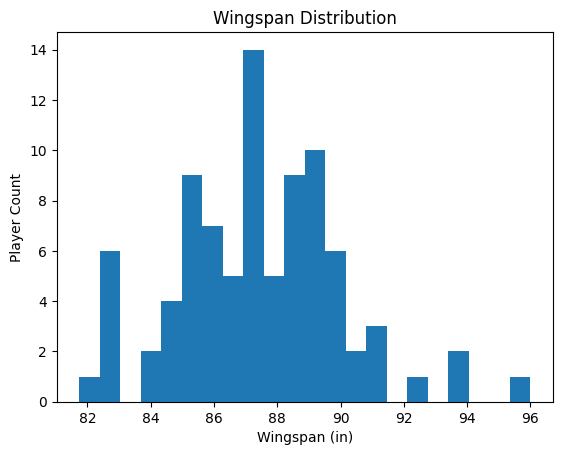

In [66]:
# Histogram: Wingspan distribution
column = 'Wingspan'
plt.hist(wingspan_center[column], bins=22)
plt.title('Wingspan Distribution')
plt.xlabel('Wingspan (in)')
plt.ylabel('Player Count')
plt.show()

In [67]:
!git clone --depth 1 --filter=blob:none --sparse https://github.com/fivethirtyeight/data.git
%cd data
!git sparse-checkout init --cone
!git sparse-checkout set nba-raptor
Raptor = pd.read_csv('/content/data/nba-raptor/modern_RAPTOR_by_player.csv')
raptor = Raptor[Raptor['mp'] > 400]
raptor.head(5) #Read csv and display first 5 rows

Cloning into 'data'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 178 (delta 0), reused 137 (delta 0), pack-reused 0
Receiving objects: 100% (178/178), 36.19 KiB | 1.29 MiB/s, done.
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 5 (delta 0), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (5/5), 12.05 KiB | 3.01 MiB/s, done.
/content/data/data/data
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5 (delta 2), reused 5 (delta 2), pack-reused 0
Receiving objects: 100% (5/5), 3.76 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (2/2), done.


,player_name,player_id,season,poss,mp,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,predator_offense,predator_defense,predator_total,pace_impact
0,Alex Abrines,abrinal01,2017,2387,1135,0.745505,-0.372938,0.372567,-0.418553,-3.857011,-4.275564,0.543421,-1.144832,-0.601411,1.249008,1.447708,-0.198700,0.077102,-1.038677,-0.961575,0.326413
1,Alex Abrines,abrinal01,2018,2546,1244,0.317549,-1.725325,-1.407776,-1.291727,-0.049694,-1.341421,-0.020826,-1.502642,-1.523468,0.777304,0.465912,0.311392,-0.174621,-1.112625,-1.287247,-0.456141
2,Alex Abrines,abrinal01,2019,1279,588,-3.215683,1.078399,-2.137285,-6.158856,4.901168,-1.257688,-4.040157,1.885618,-2.154538,0.178167,0.178167,0.000000,-4.577678,1.543282,-3.034396,-0.268013
3,Precious Achiuwa,achiupr01,2021,1581,749,-4.122966,1.359278,-2.763688,-4.050779,-0.919712,-4.970491,-4.347596,0.954821,-3.392775,-0.246055,-0.246776,0.000721,-3.817713,0.474828,-3.342885,0.329157
4,Precious Achiuwa,achiupr01,2022,3802,1892,-2.521510,1.763502,-0.758008,-1.687893,3.103441,1.415548,-2.517372,2.144151,-0.373221,2.262658,2.309611,-0.046953,-2.483956,2.024360,-0.459596,-0.728609


In [68]:
#Importing libraries for data analysis:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Join datasets
center_merged_data = pd.merge(raptor, wingspan_center, how='inner', left_on='player_name', right_on='Name')

In [69]:
# Summary Statistics: Wingspan
summary_stats_wingspan = wingspan_center['Wingspan'].describe()
print(summary_stats_wingspan)

# Correlation: Center Wingspan vs. Total Raptor
correlation = center_merged_data['Wingspan'].corr(center_merged_data['raptor_total'])
print(f"Correlation between Wingspan and Total Raptor: {correlation}")

count    87.000000
mean     87.459770
std       2.645717
min      81.750000
25%      85.750000
50%      87.500000
75%      89.000000
max      96.000000
Name: Wingspan, dtype: float64
Correlation between Wingspan and Total Raptor: 0.19288942374397441


<ipython-input-70-65e0ac4c363e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Wingspan', y='raptor_total', data=center_merged_data, ci=None)


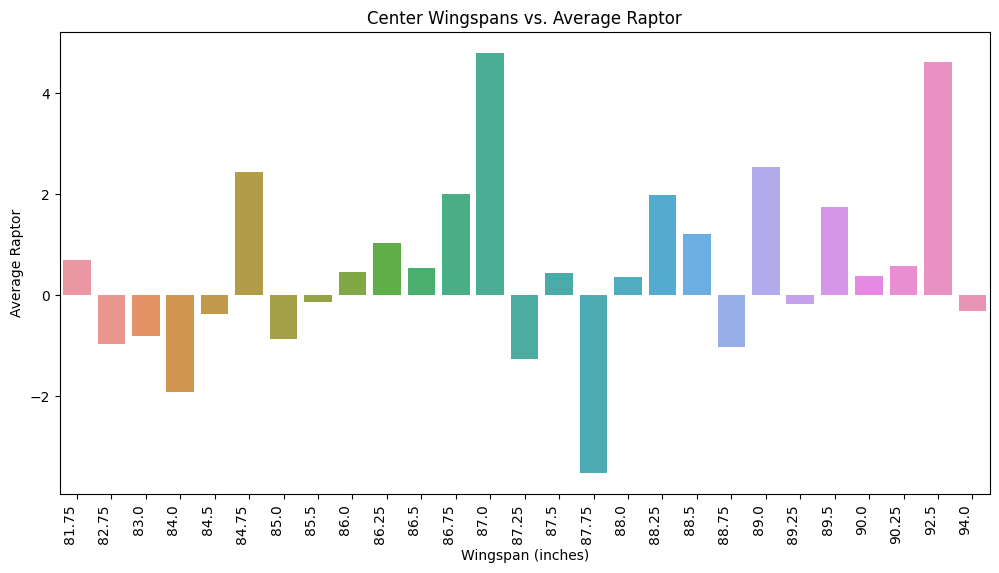

In [70]:
# Grouped bar chart: Wingspan vs. Average Raptor
plt.figure(figsize=(12, 6))

sns.barplot(x='Wingspan', y='raptor_total', data=center_merged_data, ci=None)
plt.title('Center Wingspans vs. Average Raptor')
plt.xlabel('Wingspan (inches)')
plt.ylabel('Average Raptor')

plt.xticks(rotation=90, ha='right')
plt.show()

Looking at just centers, there is a pattern where most the players with a wingspan of at least 84.75 have positive RAPTOR scores, on average. The centers with wingspans below that length are below average players, on average (Negative RAPTOR scores).

<Figure size 1000x600 with 0 Axes>

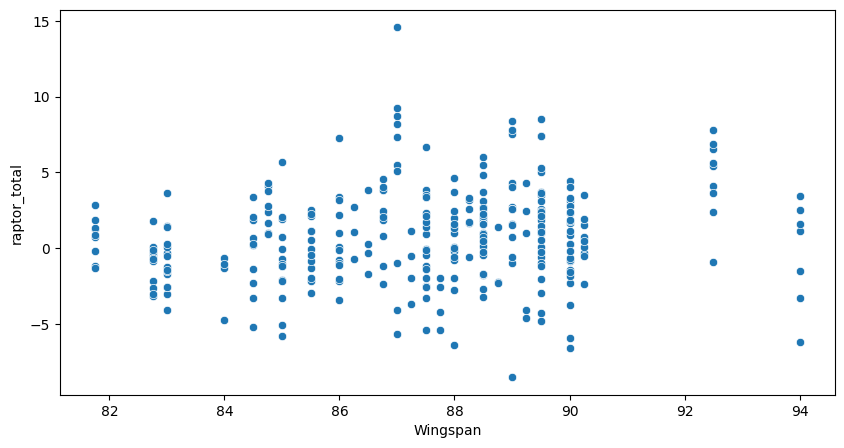

<Figure size 1000x600 with 0 Axes>

In [71]:
# Scatter plot: Wingspan vs. Total Raptor
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Wingspan', y='raptor_total', data=center_merged_data)
plt.figure(figsize=(10, 6))

The scatter plot shows that players with the same wingspan have quite varied RAPTORs. The players with the highest RAPTOR scores all have average or above average wingspans. None of the players with the longest wingspans have star level RAPTOR scores, but Victor Wembenyama will buck that trend. His RAPTOR is not included because he is a rookie, but he has the longest wingspan in the league.

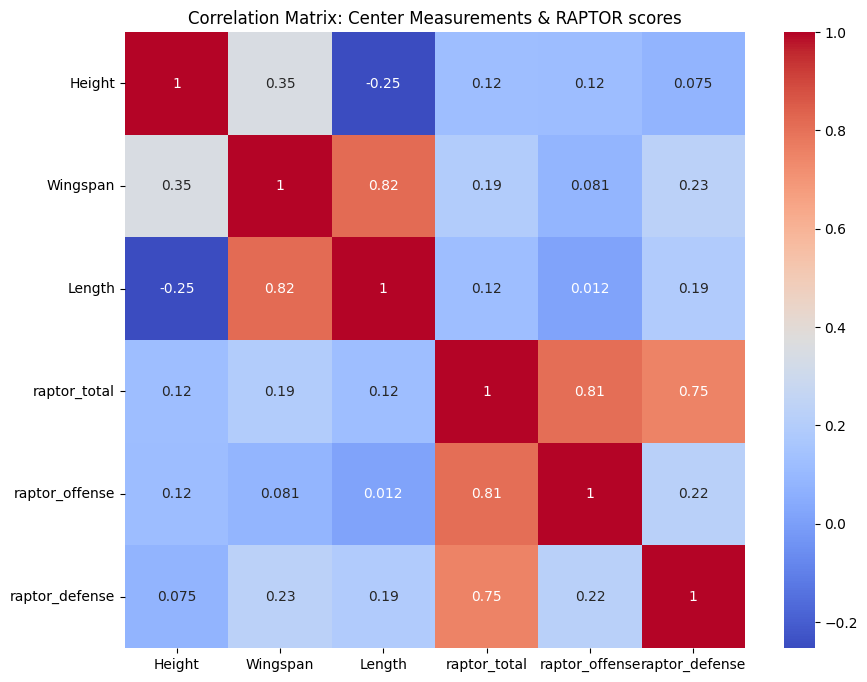

In [72]:
# Correlation matrix: Height and wingspan vs. each Raptor score for Centers
correlation_columns = ['Height', 'Wingspan', 'Length', 'raptor_total', 'raptor_offense', 'raptor_defense']

subset_data = center_merged_data[correlation_columns]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Center Measurements & RAPTOR scores')
plt.show()

Among centers, wingspan has a higher correlation than height to RAPTOR scores. Defensive RAPTOR has a slightly higher correlation to wingspan than Total RAPTOR does. We predicted this because height and length are important traits to protect the rim.

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Join datasets
guard_merged_data = pd.merge(raptor, wingspan_guard, how='inner', left_on='player_name', right_on='Name')

<ipython-input-74-0be9c0409c9b>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Wingspan', y='raptor_total', data=guard_merged_data, ci=None)


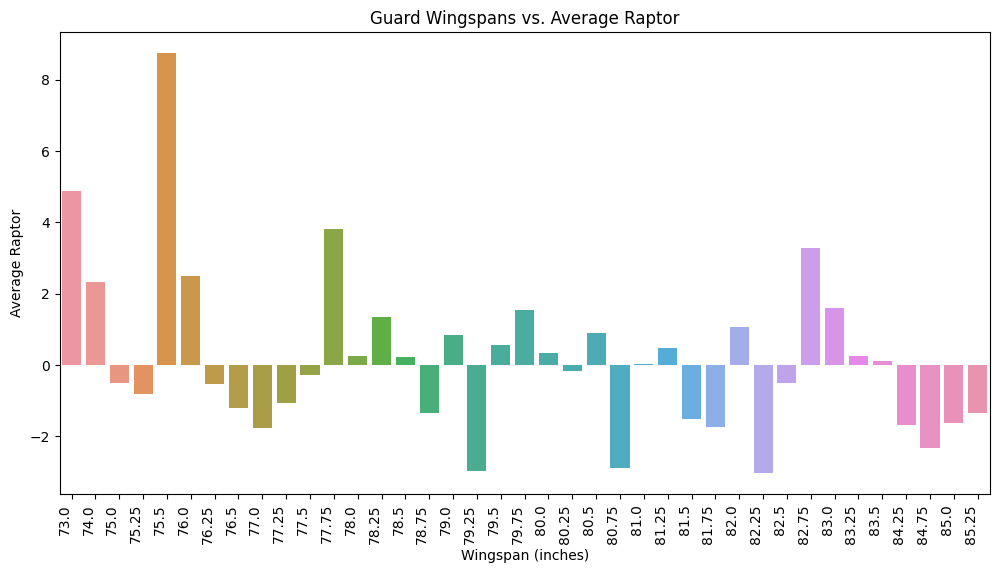

In [74]:
# Grouped bar chart: Wingspan vs. Average Raptor for Guards
plt.figure(figsize=(12, 6))

sns.barplot(x='Wingspan', y='raptor_total', data=guard_merged_data, ci=None)
plt.title('Guard Wingspans vs. Average Raptor')
plt.xlabel('Wingspan (inches)')
plt.ylabel('Average Raptor')

plt.xticks(rotation=90, ha='right')
plt.show()

We believe that the bar plot does not show a pattern. Although the 2 bins with the highest average RAPTORs have very short wingspans, they are victim to small sample size. There is a smaller sample size of guards with very short wingspans, and if they are in the NBA with that size, it is because they are very talented. Jose Alvarado is the only player with a 6'1" wingspan, and had an exceptional rookie season. He was undrafted in large part due to his size.

<Figure size 1000x600 with 0 Axes>

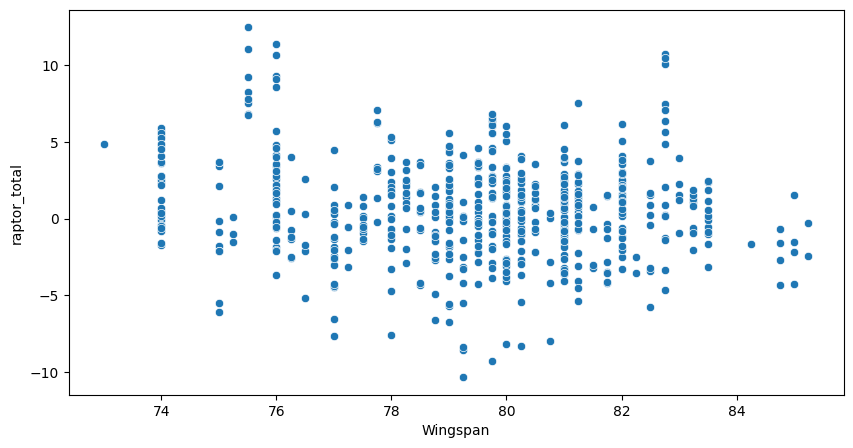

<Figure size 1000x600 with 0 Axes>

In [75]:
# Scatter plot: Wingspan vs. Total Raptor for Guards
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Wingspan', y='raptor_total', data=guard_merged_data)
plt.figure(figsize=(10, 6))

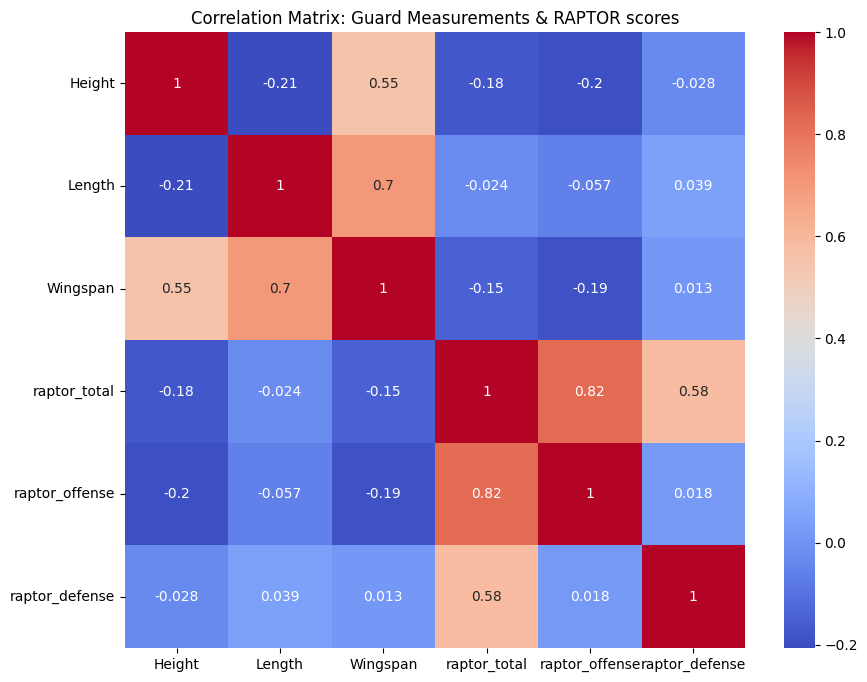

In [76]:
# Correlation matrix: Height and wingspan vs. each Raptor score for Guards
correlation_columns = ['Height','Length', 'Wingspan', 'raptor_total', 'raptor_offense', 'raptor_defense']

subset_data = guard_merged_data[correlation_columns]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Guard Measurements & RAPTOR scores')
plt.show()

With guards, height was slightly more of a factor than wingspan. The media and NBA Draft experts typically discuss height more than wingspan when discussing guards. Offensive RAPTOR had a higher correlation to height and wingspan than Defensive RAPTOR. Unlike forwards and centers, guards are not relied upon to protect the rim and block shots.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Join datasets
forward_merged_data = pd.merge(raptor, wingspan_forward, how='inner', left_on='player_name', right_on='Name')

<ipython-input-78-e1ce9de90dfa>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Wingspan', y='raptor_total', data= forward_merged_data, ci=None)


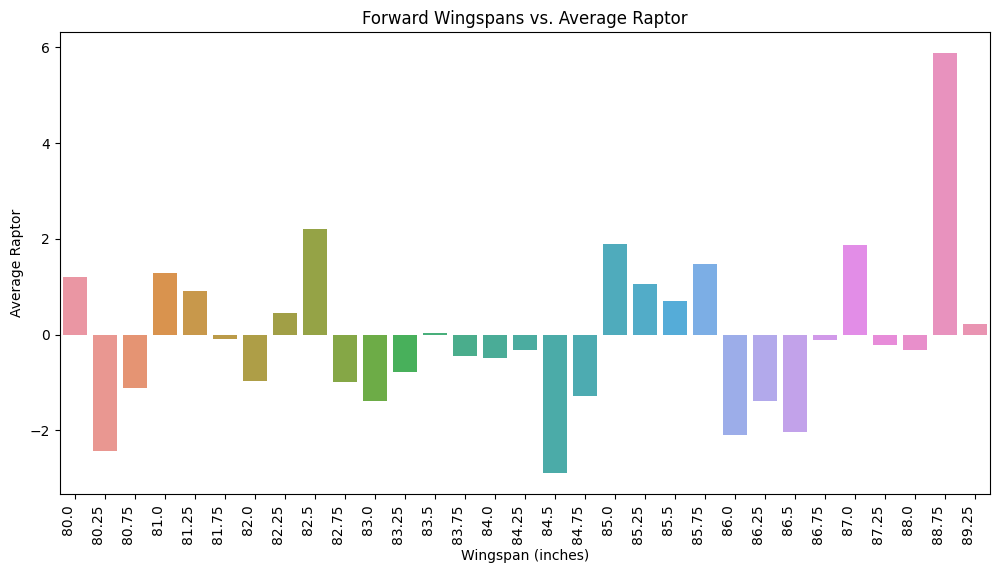

In [78]:
# Grouped bar chart: Wingspan vs. Average Raptor for Forwards
plt.figure(figsize=(12, 6))

sns.barplot(x='Wingspan', y='raptor_total', data= forward_merged_data, ci=None)
plt.title('Forward Wingspans vs. Average Raptor')
plt.xlabel('Wingspan (inches)')
plt.ylabel('Average Raptor')

plt.xticks(rotation=90, ha='right')
plt.show()

The forward bar plot also does not show much of a pattern. The highest bin by far is the bin with the second longest wingspan, but that is skewed by Kevin Durant being in a small sample.

<Figure size 1000x600 with 0 Axes>

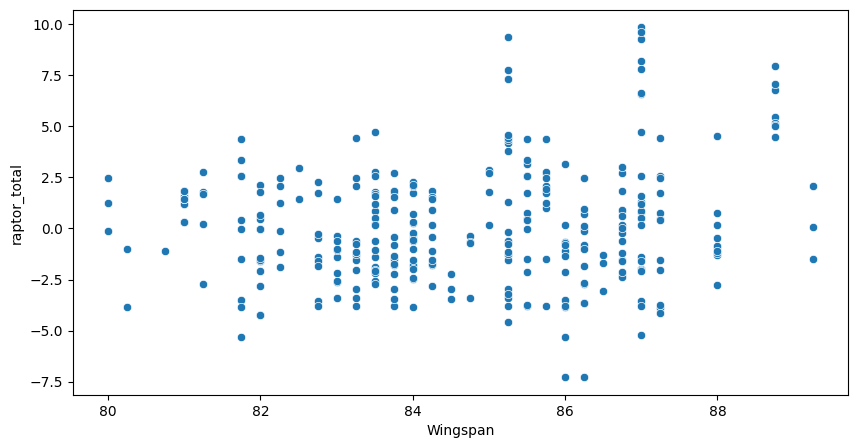

<Figure size 1000x600 with 0 Axes>

In [79]:
# Scatter plot: Wingspan vs. Total Raptor for Forwards
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Wingspan', y='raptor_total', data=forward_merged_data)
plt.figure(figsize=(10, 6))

The forwards scatter plot shows us that all of the forwards with RAPTORS above 5 (> 10 players) have an above average wingspan for their position. This is a significant observation.

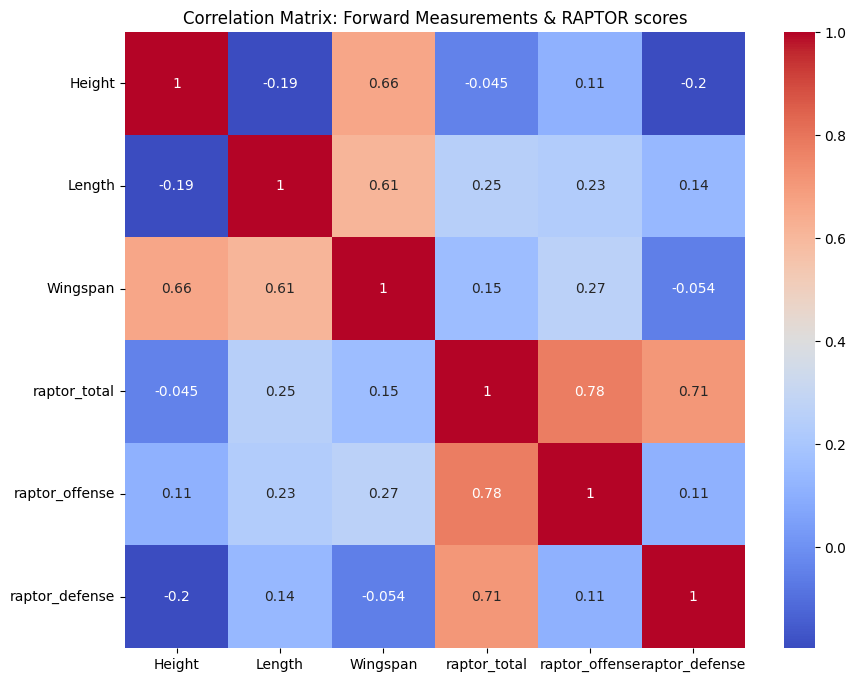

In [80]:
# Correlation matrix: Height and wingspan vs. each Raptor score for Forwards
correlation_columns = ['Height', 'Length', 'Wingspan', 'raptor_total', 'raptor_offense', 'raptor_defense']

subset_data = forward_merged_data[correlation_columns]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Forward Measurements & RAPTOR scores')
plt.show()

As predicted, length has a higher correlation with RAPTOR than wingspan, among forwards. The difference between height and wingspan may have an impact on forwards' performance. Surprisingly, offensive raptor and wingspan had the highest correlation between the 3 measurement variables and the 3 algorithmic metrics.

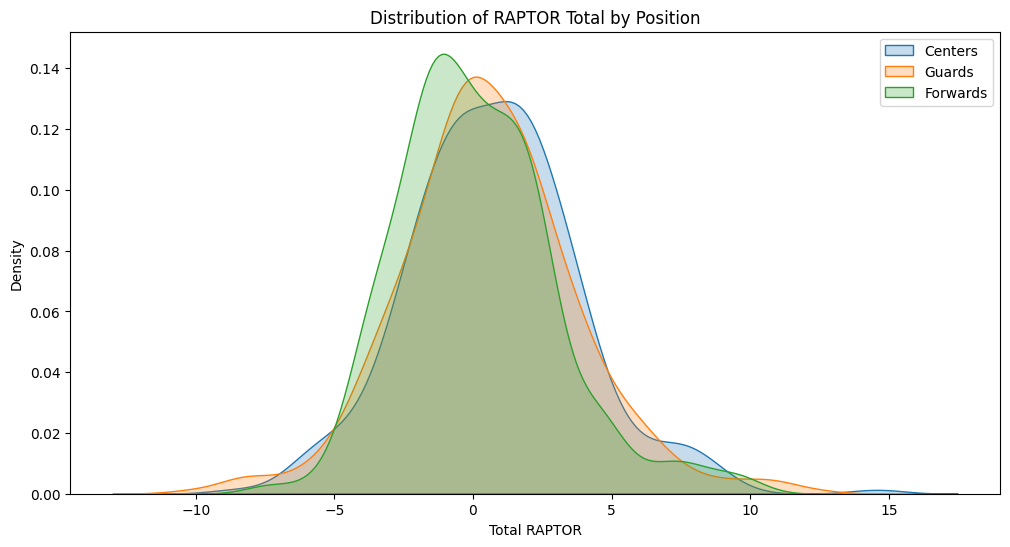

In [81]:
#Density plot of RAPTOR scores by position
plt.figure(figsize=(12, 6))
sns.kdeplot(data=center_merged_data, x='raptor_total', fill=True, label='Centers', common_norm=False)
sns.kdeplot(data=guard_merged_data, x='raptor_total', fill=True, label='Guards', common_norm=False)
sns.kdeplot(data= forward_merged_data, x='raptor_total', fill=True, label='Forwards', common_norm=False)
plt.title('Distribution of RAPTOR Total by Position')
plt.xlabel('Total RAPTOR')
plt.ylabel('Density')
plt.legend()
plt.show()

In [82]:
from scipy.stats import f_oneway

# Example for ANOVA
f_stat, p_value = f_oneway(center_merged_data['raptor_total'], guard_merged_data['raptor_total'], forward_merged_data['raptor_total'])
print(f"ANOVA p-value: {p_value}")

ANOVA p-value: 0.02296213834030722


Among centers, there is a correlation worth noting between defensive RAPTOR and wingspan. So, we will bring in a third dataset and investigate the correlation between wingspan and advanced defensive metrics such as DFG% at the rim. Defensive field goal percentage measures the rate opponents score at when the specified player is the nearest defender. It is most accurate when filtered to within 5 feet from the basket. This would apply to centers.

The reigning DPOY Jaren Jackson JR had the highest wingspan among forwards and is known to be a great rim protector according to the eye test as well as DFG%.

We also could build a model that uses both height, wingspan, and length to predict RAPTOR scores, if controlling for position. We do not believe that it will be an accurate enough model though.